# <span style="color:red">VBMicrolensing</span>

# Head

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.lines import Line2D
import VBMicrolensing

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Initialize

In [16]:
# Initialize VBMicrolensing() class object
VBM = VBMicrolensing.VBMicrolensing()
#Set relative accuracy
VBM.RelTol = 1e-03
#Set accuracy
VBM.Tol=1e-03
# Set the Method that you want use : Singlepoly, Multipoly, Nopoly.
VBM.SetMethod(VBM.Method.Nopoly)

# Light Curve

In [17]:
# Separation between the first two lenses in descending order of mass in units of total ang. Einstein radii
s12 = 0.765

# Mass ratio lens 2
q2 = 0.00066

# impact parameter
u0 = 0.0060

# alpha
alpha= 3.212

# source radius in Einstein radii of the total mass.
rho = 0.00567

# einstein radius crossing time
tE = 50.13

# time of peak magnification
t0 = 0

#eparation between the last two lenses in descending order of mass in units of total ang. Einstein radii
s23=1.5

# Mass ratio lens 3
q3=0.000001

# beta
beta=-1.5


num_points = 1000
tmin = -50
tmax = 50
t = np.linspace(t0 + tmin, t0 + tmax, num_points)


tau = (t - t0)/tE
y1 = -u0*np.sin(alpha) + tau*np.cos(alpha)
y2 = u0*np.cos(alpha) + tau*np.sin(alpha)


params = [np.log(s12), np.log(q2), u0, alpha, np.log(rho), np.log(tE), t0, np.log(s23), np.log(q3), beta]

magtriple = VBM.TripleLightCurve(params, t)

In [18]:
# Calculate the cirtical curves and the caustic curves
solutions = VBM.PlotCrit() # Returns _sols object containing n crit. curves followed by n caustic curves
print(type(solutions))

<class 'VBMicrolensing.VBMicrolensing._sols'>


In [19]:
# generator function iterating over _sols, _curve, or _point objects 
# making use of the next keyword
def iterate_from(item):
    while item is not None:
        yield item
        item = item.next

curves = []
for curve in iterate_from(solutions.first):
    for point in iterate_from(curve.first):
        curves.append((point.x1, point.x2))
        
critical_curves = np.array(curves[:int(len(curves)/2)])
caustic_curves = np.array(curves[int(len(curves)/2):])

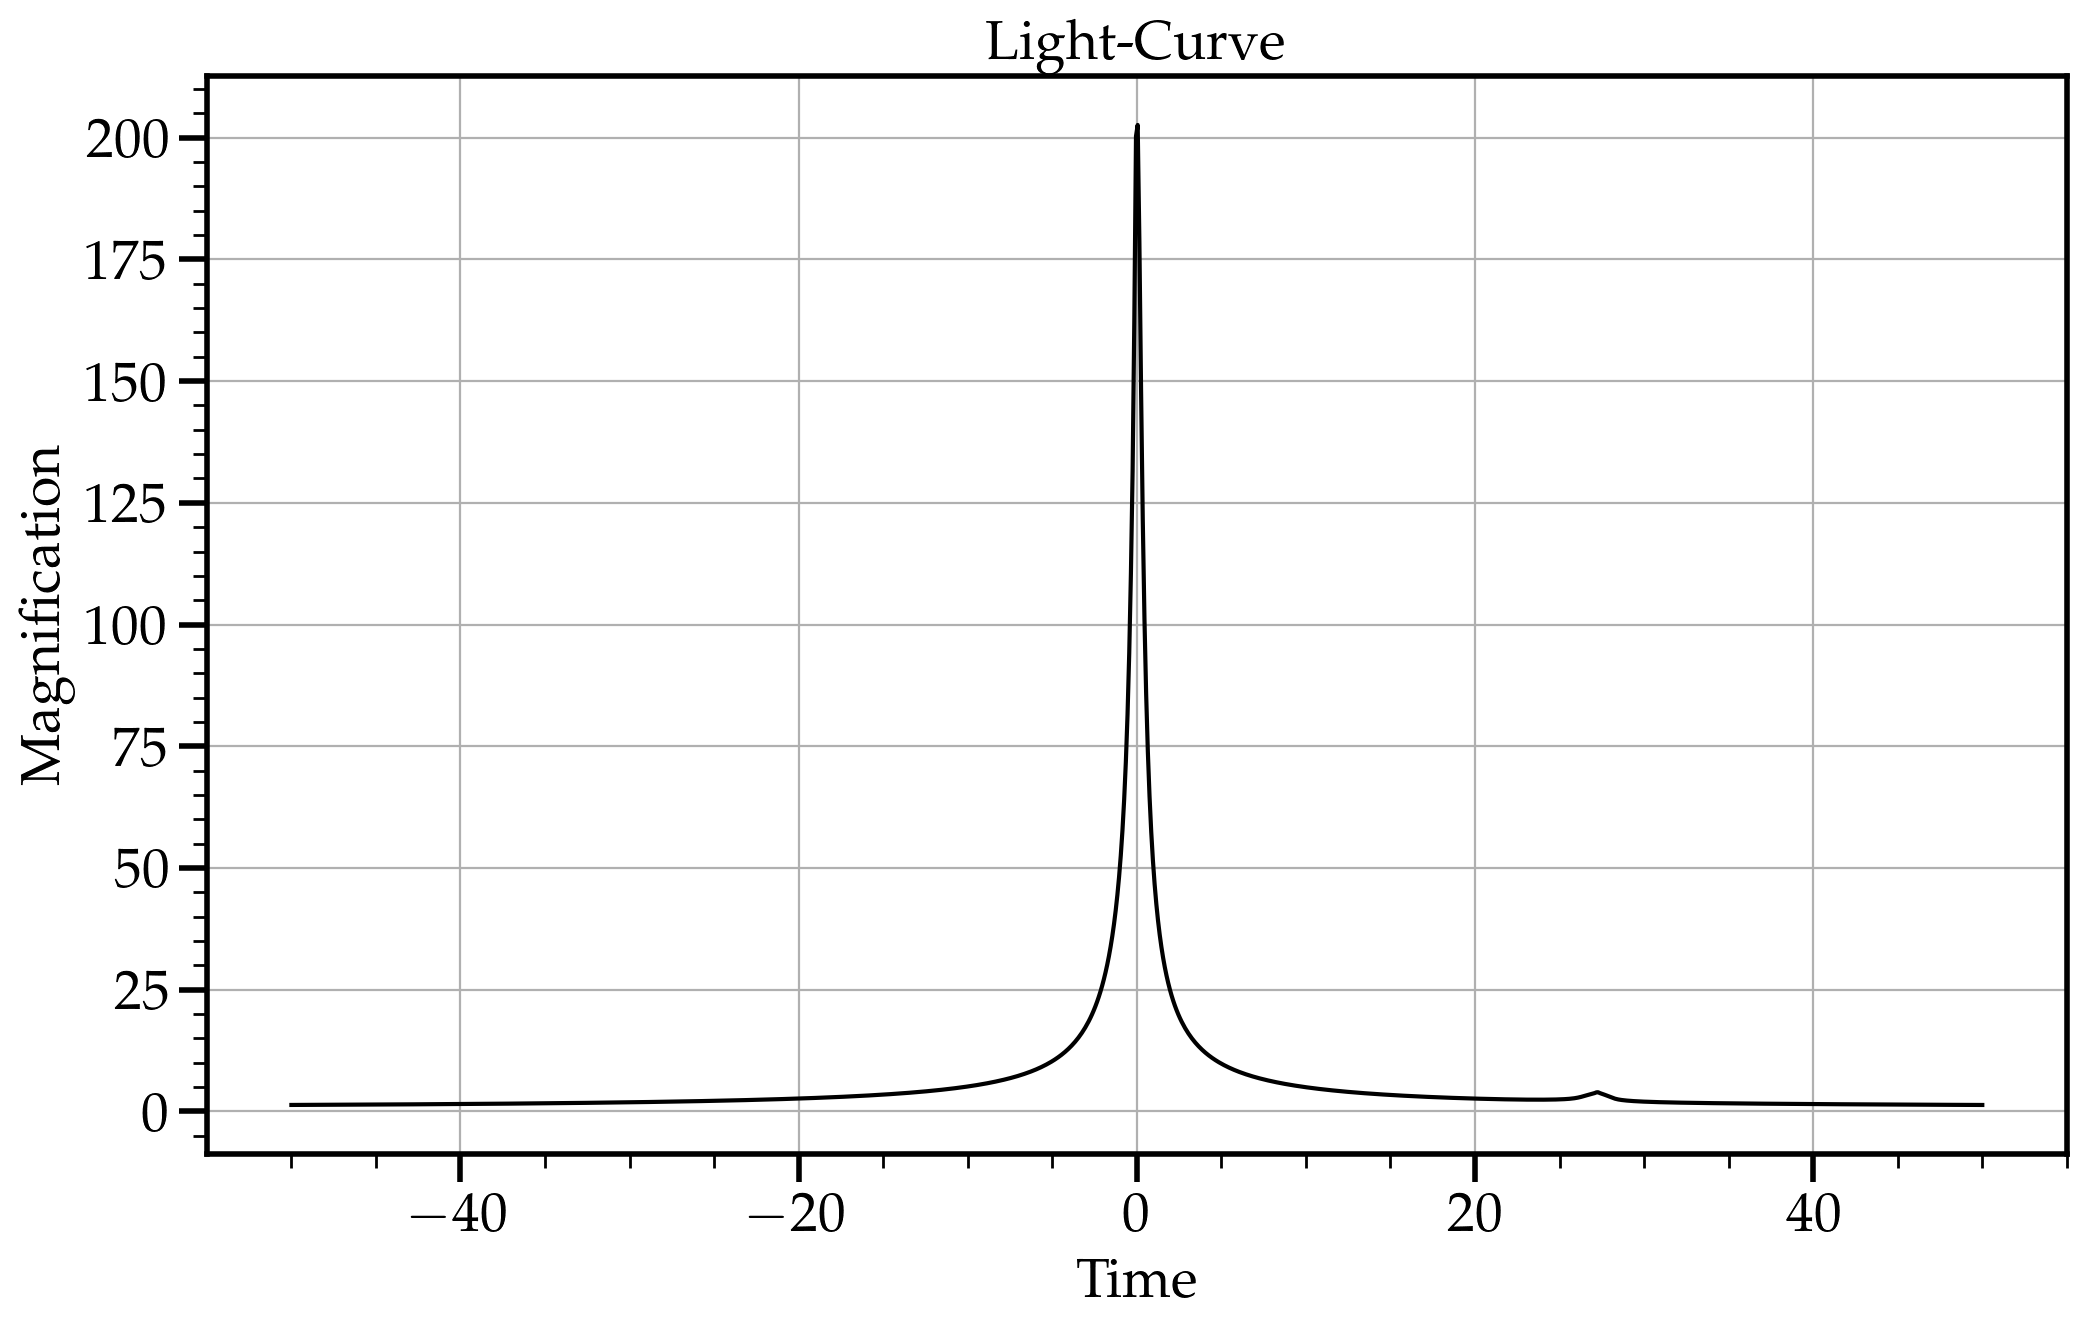

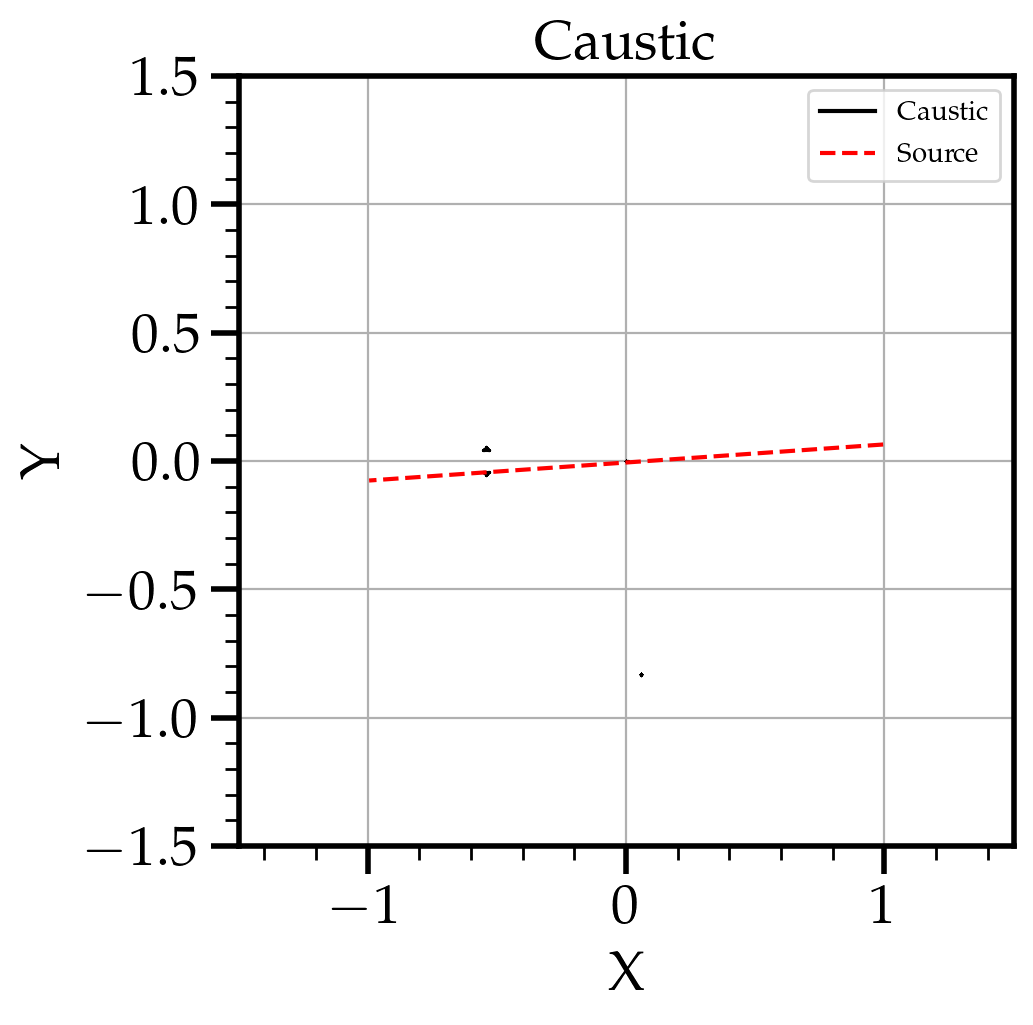

In [20]:
import matplotlib.pyplot as plt

# Definisci i dati per il primo plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(t, magtriple[0], 'k-')
ax.grid(True)
ax.set_title('Light-Curve')
ax.set_xlabel('Time')
ax.set_ylabel('Magnification')
ax.minorticks_on()  # Aggiungi tick minori

# Modifica lo spessore e la lunghezza dei ticks per il primo plot
ax.tick_params(axis='both', which='major', width=2, length=10)
ax.tick_params(axis='both', which='minor', width=1, length=5)

# Modifica lo spessore del frame
for spine in ax.spines.values():
    spine.set_linewidth(2)

# Definisci i dati per il secondo plot
fig2 = plt.figure(figsize=(5, 5))
ax2 = fig2.add_subplot(111)
ax2.plot(caustic_curves[:, 0], caustic_curves[:, 1], 'ko', markersize=0.1)
ax2.plot(y1, y2, 'r--', label='Source')
ax2.grid(True)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_title('Caustic')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.minorticks_on()  # Aggiungi tick minori

# Aggiungi la legenda per il trattino nero e per "Source"
custom_legend = [
    Line2D([0], [0], color='black', linestyle='-'),
    Line2D([0], [0], color='red', linestyle='--')
]
ax2.legend(custom_legend, ['Caustic', 'Source'], loc='best')

# Modifica lo spessore e la lunghezza dei ticks per il secondo plot
ax2.tick_params(axis='both', which='major', width=2, length=10)
ax2.tick_params(axis='both', which='minor', width=1, length=5)

# Modifica lo spessore del frame
for spine in ax2.spines.values():
    spine.set_linewidth(2)

plt.show()
